<a href="https://colab.research.google.com/github/ejjjjkang/computational_methods/blob/main/INFO6010_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 6010 Homework: hypothesis testing and distributions

The goal of this homework is to get familiar with how we can use cumulative distribution functions (CDFs) to build a case that an observation is or is not consistent with what we would expect from a certain distribution.

In most cases we are trying to determine if there is a simple, boring explanation for the particular observation. We might hope to show that something is consistent with an assumption of normality to reassure a reviewer. Or we might want to show that an observed sample is unlikely to have a mean that is equal to zero.

In [ ]:
import numpy as np
import pandas as pd
import seaborn
from matplotlib import pyplot

from scipy.stats import norm as normal_dist
from scipy.stats import expon as exponential_dist0
from scipy.stats import t as t_dist
from scipy.stats import uniform as uniform_dist
from scipy.stats import tstd

from scipy.stats import ttest_1samp, ttest_ind

import scipy.special

## Part 0: progress log

Keep a log of what you found difficult or any bugs that you encountered. Note anything or any person who helped you get unstuck.




**Answer here**

> I got specifically stucked when I conduct part 2 and part 3 in describing the results. I got advise from Infosci graduate students in terms of expression and direction of the solution flow. Other than that, I did not work with others for making same results. \\

> In terms of resources, I usually referred to documentation of scipy and other documents describing t-test and qq plot. The most helpful resource was videos describing conceptual background of statistics (https://www.youtube.com/watch?v=IFKQLDmRK0Y&t=188s&ab_channel=StatQuestwithJoshStarmer). 

> Overall, it first seems easy but not easy actually, I've realized I am lacking the fundermental background for it, and learn a lot through assignment.



## Part 1: QQ plots (30 pts)

A QQ plot is a way of comparing the actual *order statistics* (ie the lowest of $n$ values, the second lowest, etc) to the theoretical values of $N$ points evenly spaced in probability through the CDF of some *reference distribution*. It is closely related to the Shapiro-Wilk test that you may hear about.
The reference distribution could be any continuous (floating point) distribution, but we often use the normal distribution.
In this problem you will use the following function to generate histograms and QQ plots. The goal is for you to be able to recognize when a QQ plot fits, and to infer what is happening when the plot does not fit in different ways.

In [ ]:
def normal_qq(x):
    n = len(x)
    print(x.mean(), x.std())
    percentiles = np.linspace(1 / (n+1), n / (n+1), n)
    quantiles = normal_dist.ppf(percentiles)
    qq_df = pd.DataFrame({"Percentiles": percentiles, "Theoretical": quantiles, "Actual": np.sort(x)})
    pyplot.show()
    # show the actual histogram of observations
    seaborn.histplot(x, bins=16)
    pyplot.show()
    # show the QQ plot
    seaborn.scatterplot(data=qq_df, x="Theoretical", y="Actual")
    pyplot.show()

Create a sample with `size` of 30 points from a normal distribution with mean (or *location*) 1000 and standard deviation (or *scale*) 500 using the `normal_dist.rvs()` function ([API documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)). Use the `normal_qq` function provided above to display this sample array. Comment on how you interpret the plots displayed. Is your sample consistent with the standard (mean 0, std dev 1) normal distribution? How does the QQ plot convey the ways that the sample is and is not consistent? You may want to rerun the cell several times to get a sense of what is consistent across multiple samples.

Create a sample with `size` of 30 points from a t distribution with `df=2`. Answer the same questions as for the normal distribution.

Create a sample with `size` 30 points from a uniform distribution with min=0 and max=1 (note this is the default range for scipy's uniform distribution. Answer the same questions.

910.4533165225764 436.7111871243746


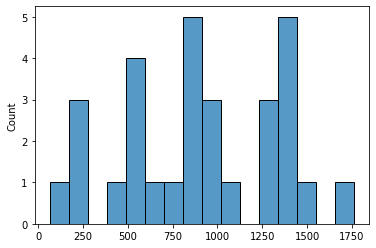

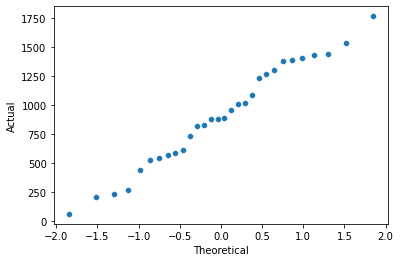

In [ ]:
# code here
sample1 = normal_dist.rvs(loc=1000, scale=500, size=30)
normal_qq(sample1)

**Answer here:**

1.  how you interpret the plots displayed

> *  The plot almost shows a straight line when we assume that there is a line connecting the data points of two tails, but the distribution of data points located in two tails is irregular in qq-plot.

2.  Is your sample consistent with the standard (mean 0, std dev 1) normal distribution?

> * Yes, it is consistent with the standard normal sitribution. Result of histogram does not alike a bell curve. This may be interpreted that the sample is inconsistent with the standard normal distribution, but the reason is that the number of data points (size) is only 30. The data points are currently centered on mean (0), and two tails of q-q plot are showing sparse distribution. When we create random samples centered on normal distribution 10000, it shows a clear straight line in QQ plot. 

3.  How does the QQ plot convey the ways that the sample is and is not consistent?

> * When qq plot shows a straight line, it implies sample is consistent, if it shows a skewed line in the qq plot, it implies the sample is not consistent.

0.4839550980091399 2.3606859813759558


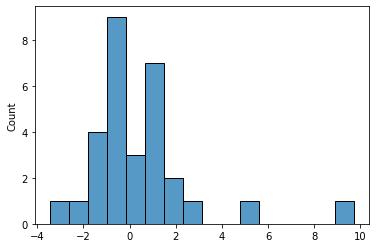

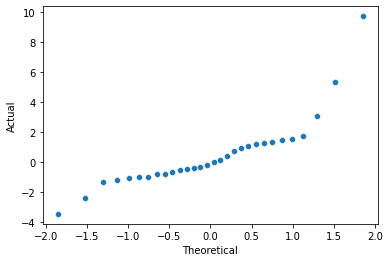

In [ ]:
# code here : Create a sample with size of 30 points from a t distribution with df=2. Answer the same questions as for the normal distribution.

sample2 = t_dist.rvs(df=2, size=30)
normal_qq(x= sample2)

**Answer here:**

1.  how you interpret the plots displayed

> *  As similar as the normal distribution qq plot, the plot also closely shows a straight line. But the data points sparsed on qq-plot are more located close to the center and the two tails of the qq plot is extremly sparsed.

2.  Is your sample consistent with the standard (mean 0, std dev 1) normal distribution?

> * As the qq plot is close to the straight line, it is interpreted as consistent with the standard. Normally, t-distribution is used when we have less observations (n \< 30\). As the number of observations is large, it is close to consistent with normal distribution, so this t-distribution is likely to be consistent with normal distribution. However, t-distribution cannot assume if it is consistent with a normal distribution with the less number of observations such as 15. 

3.  How does the QQ plot convey the ways that the sample is and is not consistent?

> * Similar as qq plot of normal distribution, when qq plot shows a straight line, it implies the sample is consistent. If it shows skewed line on the qq plot, it also implies the sample is not consistent.

0.45129421829134403 0.26834440112313473


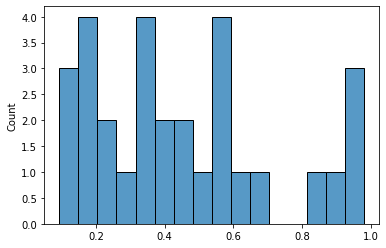

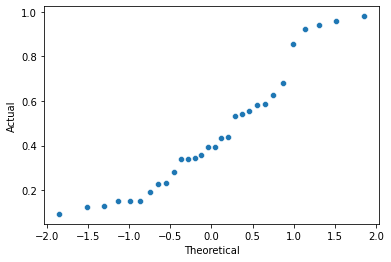

In [ ]:
# code here : Create a sample with size 30 points from a uniform distribution with min=0 and max=1 (note this is the default range for scipy's uniform distribution. Answer the same questions.
sample3 = uniform_dist.rvs(loc=0, scale=1, size=30)
normal_qq(sample3)

**Answer here:**

1.  how you interpret the plots displayed

> *  Unlike the normal distribution, the plot is likely to underdispersed. When we size up the number of data points, the result is more manifest.

2.  Is your sample consistent with the standard (mean 0, std dev 1) normal distribution?

> * As data points are uniformly distributed from 0 to 1, it is hard to perceive that the sample is consistent with standard normal distribution. The probability of data points is equal, rather than centering on mean. 

3.  How does the QQ plot convey the ways that the sample is and is not consistent?

> * In terms of qq plot, if it is consistent with normal distribution, the plot should show a straight line.

## Part 2: Compare bootstrap, z-test, and t-test (20 points)

A one-sample test compares a function of an array of observed values to a pre-defined *critical value*, which is often zero.
For example, we might want to test if INFO undergrads take an average of 20 credits per semester. In this case the function would be the mean, the array would be the number of credits taken by $N$ undergrads, and the critical value would be 20.
Another common example is testing whether a regression coefficient is significant. The function is linear regression, the array is the inputs and output variables, and the critical value is zero, indicating that a particular input has no predictive effect.

In both cases there's a simple answer: calculate the mean and see if it's 20, calculate the regression and see if it's zero. What we're asking is more subtle. If we observed slightly different data, we might get a different number. Do we have enough evidence to say that the real, underlying value was definitely *not* 20 or 0? Remember the visuals in class. We want to pay attention to how spread out the values are, and how close the observed mean is to the critical value *relative to that spread*.

In this problem you will use three methods to calculate a $p$-value, representing the probability that a specific array of numbers could have been generated by a distribution with mean 0, or something more extreme.

In [ ]:
# We'll use this array of values
x = np.array([-1, 1, 2, 3, 4, 5])

Create variables for the mean of the array, the standard deviation, the *degrees of freedom* which in this case will be the length of the array minus one, and the standard error, which is the standard deviation divided by the square root of the degrees of freedom. Print these values.

In [ ]:
import math

#mean of x
mean_x = np.mean(x)
print("mean of x: ", mean_x)

std = np.std(x)
print('standard deviation of x: ', std)

#degree of freedom
df = len(x)-1
print("df: ", df)

#standard error
stderr = std / math.sqrt(df)
print("standard error: ", stderr)

mean of x:  2.3333333333333335
standard deviation of x:  1.9720265943665387
df:  5
standard error:  0.8819171036881969


Use `ttest_1samp` to find the $p$-value that the critical value `popmean` is 0. Print this value. Note that `ttest_1samp` returns an object with a property called `pvalue`.

In [ ]:
result = ttest_1samp(x, popmean=0)
print(result)

Ttest_1sampResult(statistic=2.6457513110645907, pvalue=0.0456591237814116)


The following code creates an array with the means of 1000 bootstrap resamplings from the original data.
Use this array to count the number of resampled means that are less than 0, or greater than twice the mean of $x$.
Syntax hint: if you compare a numpy array to a value, it returns an array of True/False values. Calling `np.sum()` on that array returns the total number of True values.

In [ ]:
bootstrap_means = np.zeros(1000)

for i in range(1000):
    bootstrap_means[i] = np.random.choice(x, len(x), replace=True).mean()

In [ ]:
count = np.logical_or(bootstrap_means <= 0, bootstrap_means >= mean_x*2)

print('p values by bootstrap method: ', np.sum(count)/1000)

p values by bootstrap method:  0.004


**z test** Use the `normal_dist.cdf()` function to calculate the two-tailed probability that a normal distribution with mean 0 and the standard deviation of the array would generate a sample with six elements that has a mean further from 0 than the observed mean. Print this value. Hint: use values you have calculated. Confidence check: this should be larger than the bootstrap estimate, but smaller than the t-test p-value.

**t test** Now do the same calculation but use the `t_dist.cdf()` function instead to do the same two-sided tail probability. You will need to specify the `df` degrees of freedom parameter. Print this value. Confidence check: this should be equal to the p-value from the t-test.

In [ ]:
print('bootstrap p value: ', np.sum(count)/1000)
z_test = normal_dist.cdf(0, loc=mean_x, scale=stderr)
print("z_test p value: ", z_test*2)

t_test = t_dist.cdf(0, df=df, loc=mean_x, scale=stderr)
print("t_test p value: ", t_test*2)
print("t_test result is same as 1sample t test result? :", np.equal(result.pvalue, t_test*2))

bootstrap p value:  0.004
z_test p value:  0.008150971593502691
t_test p value:  0.0456591237814116
t_test result is same as 1sample t test result? : True


Rank the tests in order from the test that is *most* suspicious of this sample (least likely to predict the sample came from mean 0) to *least* suspicious. Explain why the probabilities you calculated show this relationship.

**Answer here:**

> t-test > bootstrap  > z-test \\
> t-test is the most likely to predict the sample came from mean 0 (least suspicious) and z-test is the most suspicious. When we consider the original population is normally distributed, as the observation is less than 30 (==30), and the result shows that p-value from the t-distribution is highly believeable. On the other hand, z-test should be used when the observations are actually normally distributed or the observation should be over 30, it has less validity as well as the result shows far less p-value. \
When we cannot assume that the original population is normal distributed, bootstrap is more reliable method for the small sample. 


## Part 3: interpreting p-values (25 points)

In the previous example we kept the data array the same and tried different tests. Here we'll keep the test the same (one sample t test vs. mean=0), and compare a large number of data arrays.

The [1-sample t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp) takes a single array and asks one question: is the actual/population mean of the array equal to some number $\mu$? Note that we are not asking about the *sample* mean -- that's just a function we can calculate from the array itself. We're asking about whether it's likely that the array was generated from a distribution whose mean is $\mu$.

This next block runs a 1-sample t-test with the critical value (`popmean`) $\mu=0$ on a sample of 30 points that we are actually generating from a distribution with mean zero. The value returned by the `ttest_1samp` function is an object that contains two values, a test statistic $t$ and a $p$ value.

Run the cell, and check if your $p$ value is less than 0.05. If it is, congratulations! You reject the null hypothesis at $p=0.05$. You have made a *false discovery*.

If you have not made a false discovery, keep rerunning the cell until you get $p\leq 0.05$. How many times do you expect to run the cell, on average, before you make a false discovery?

In [ ]:
num_1 = 0

for i in range (100):
  sample = np.random.normal(0, 1, 30)
  test_result = ttest_1samp(sample, popmean=0)
  print("mean: {:.2f} std: {:.2f} t: {:.2f} p: {:.3f} {}".format(sample.mean(),
                                                               sample.std(),
                                                               test_result.statistic,
                                                               test_result.pvalue,
                                                               "*" if test_result.pvalue <= 0.05 else ""))
  if test_result.pvalue <= 0.05:
    num_1 += 1
  
print(num_1)

mean: 0.18 std: 1.09 t: 0.91 p: 0.372 
mean: 0.17 std: 1.37 t: 0.69 p: 0.498 
mean: -0.24 std: 0.83 t: -1.55 p: 0.133 
mean: -0.10 std: 1.05 t: -0.50 p: 0.621 
mean: -0.35 std: 1.07 t: -1.74 p: 0.093 
mean: -0.38 std: 1.10 t: -1.87 p: 0.071 
mean: 0.00 std: 1.06 t: 0.02 p: 0.982 
mean: 0.02 std: 0.92 t: 0.11 p: 0.911 
mean: 0.13 std: 0.97 t: 0.70 p: 0.488 
mean: 0.13 std: 1.28 t: 0.56 p: 0.583 
mean: 0.03 std: 1.06 t: 0.16 p: 0.875 
mean: -0.05 std: 1.01 t: -0.28 p: 0.782 
mean: -0.11 std: 0.68 t: -0.88 p: 0.386 
mean: 0.17 std: 0.77 t: 1.21 p: 0.238 
mean: -0.09 std: 0.87 t: -0.55 p: 0.588 
mean: -0.08 std: 1.02 t: -0.41 p: 0.686 
mean: -0.17 std: 0.76 t: -1.24 p: 0.226 
mean: -0.20 std: 0.91 t: -1.18 p: 0.246 
mean: 0.18 std: 0.96 t: 1.01 p: 0.322 
mean: -0.05 std: 1.02 t: -0.27 p: 0.793 
mean: 0.15 std: 1.03 t: 0.80 p: 0.429 
mean: -0.30 std: 1.11 t: -1.46 p: 0.155 
mean: 0.05 std: 1.08 t: 0.23 p: 0.818 
mean: 0.14 std: 0.97 t: 0.77 p: 0.445 
mean: 0.40 std: 1.03 t: 2.09 p: 0.045 *


**Answer here:**

*   When I run the code for 100 times, I could six significance in the result. I expected to see five significances because it has 5 % probabilibty.

Now let's see what happens when the null hypothesis ($\mu = 0$) is not true. Copy the cell above, and change the mean in the `normal` function from 0 to 0.2. Repeat the experiment. If you got $p>0.05$, you have a *false negative*, and have failed to discover a true finding.

In [ ]:
num_2=0

for i in range (100):
  sample = np.random.normal(0.2, 1, 30)
  test_result = ttest_1samp(sample, popmean=0)
  print("mean: {:.2f} std: {:.2f} t: {:.2f} p: {:.3f} {}".format(sample.mean(),
                                                               sample.std(),
                                                               test_result.statistic,
                                                               test_result.pvalue,
                                                               "*" if test_result.pvalue <= 0.05 else ""))
  if test_result.pvalue <= 0.05:
    num_2 += 1
  
print(num_2)

mean: -0.09 std: 0.64 t: -0.77 p: 0.447 
mean: 0.17 std: 1.09 t: 0.83 p: 0.415 
mean: 0.06 std: 1.11 t: 0.30 p: 0.763 
mean: 0.41 std: 0.88 t: 2.52 p: 0.017 *
mean: 0.56 std: 1.24 t: 2.41 p: 0.023 *
mean: 0.10 std: 1.11 t: 0.48 p: 0.637 
mean: 0.13 std: 1.09 t: 0.63 p: 0.532 
mean: 0.56 std: 0.93 t: 3.26 p: 0.003 *
mean: 0.41 std: 1.19 t: 1.84 p: 0.075 
mean: 0.20 std: 0.94 t: 1.15 p: 0.259 
mean: 0.07 std: 1.02 t: 0.35 p: 0.733 
mean: 0.14 std: 1.30 t: 0.56 p: 0.580 
mean: 0.17 std: 1.17 t: 0.80 p: 0.431 
mean: -0.03 std: 1.10 t: -0.17 p: 0.866 
mean: 0.06 std: 0.81 t: 0.38 p: 0.708 
mean: 0.39 std: 1.11 t: 1.89 p: 0.069 
mean: 0.05 std: 1.12 t: 0.26 p: 0.798 
mean: 0.14 std: 1.01 t: 0.72 p: 0.478 
mean: 0.05 std: 1.07 t: 0.23 p: 0.817 
mean: 0.32 std: 1.25 t: 1.39 p: 0.175 
mean: 0.28 std: 1.19 t: 1.27 p: 0.213 
mean: 0.12 std: 1.18 t: 0.55 p: 0.583 
mean: -0.01 std: 0.66 t: -0.12 p: 0.906 
mean: 0.45 std: 1.16 t: 2.08 p: 0.047 *
mean: -0.17 std: 0.79 t: -1.19 p: 0.243 
mean: 0.15 st

**Answer**

*   When I run the code for 100 times, I could observe 14 significances in the result, which is more than the previous function.

The difference between 0.0 and 0.2 is small. What if the true difference is larger? Copy the cell above and change the mean in the `normal` function from 0 to 0.6. Repeat the experiment. If you got $p>0.05$, you have a *false negative*, and have failed to discover a true finding.

In [ ]:
num_3 = 0

for i in range (100):
  sample = np.random.normal(0.6, 1, 30)
  test_result = ttest_1samp(sample, popmean=0)
  print("mean: {:.2f} std: {:.2f} t: {:.2f} p: {:.3f} {}".format(sample.mean(),
                                                               sample.std(),
                                                               test_result.statistic,
                                                               test_result.pvalue,
                                                               "*" if test_result.pvalue <= 0.05 else ""))
  if test_result.pvalue <= 0.05:
    num_3 += 1
  
print(num_3)

mean: 0.63 std: 0.97 t: 3.51 p: 0.001 *
mean: 0.53 std: 1.15 t: 2.48 p: 0.019 *
mean: 0.28 std: 1.16 t: 1.32 p: 0.197 
mean: 0.57 std: 0.85 t: 3.60 p: 0.001 *
mean: 0.51 std: 1.05 t: 2.61 p: 0.014 *
mean: 0.57 std: 1.03 t: 3.00 p: 0.006 *
mean: 0.59 std: 1.00 t: 3.20 p: 0.003 *
mean: 0.47 std: 1.16 t: 2.16 p: 0.039 *
mean: 0.66 std: 1.08 t: 3.31 p: 0.003 *
mean: 0.78 std: 1.06 t: 3.97 p: 0.000 *
mean: 0.86 std: 0.84 t: 5.49 p: 0.000 *
mean: 0.52 std: 0.76 t: 3.70 p: 0.001 *
mean: 0.55 std: 1.04 t: 2.84 p: 0.008 *
mean: 0.54 std: 1.15 t: 2.55 p: 0.016 *
mean: 0.76 std: 0.74 t: 5.50 p: 0.000 *
mean: 0.34 std: 1.00 t: 1.85 p: 0.074 
mean: 0.72 std: 0.98 t: 3.97 p: 0.000 *
mean: 0.58 std: 0.78 t: 4.04 p: 0.000 *
mean: 0.78 std: 1.14 t: 3.67 p: 0.001 *
mean: 0.58 std: 0.91 t: 3.43 p: 0.002 *
mean: 0.30 std: 0.87 t: 1.83 p: 0.078 
mean: 0.58 std: 1.11 t: 2.81 p: 0.009 *
mean: 0.60 std: 1.06 t: 3.03 p: 0.005 *
mean: 0.77 std: 1.02 t: 4.07 p: 0.000 *
mean: 0.45 std: 1.08 t: 2.22 p: 0.034 *
mea

**Answer**

*   When I run the code for 100 times, I could 90 significance in the result.

Could we detect a difference between 0.0 and 0.2 if we had more data? Repeat the experiment with the mean of the `normal` function equal to 0.2, but change the size of the sample array to 100. How many times do you get a false negative? 

In [ ]:
num_4 = 0

for i in range (100):
  sample = np.random.normal(0.2, 1, 100)
  test_result = ttest_1samp(sample, popmean=0)
  print("mean: {:.2f} std: {:.2f} t: {:.2f} p: {:.3f} {}".format(sample.mean(),
                                                               sample.std(),
                                                               test_result.statistic,
                                                               test_result.pvalue,
                                                               "*" if test_result.pvalue <= 0.05 else ""))
  if test_result.pvalue <= 0.05:
    num_4 += 1
  
print(num_4)

mean: 0.36 std: 0.92 t: 3.93 p: 0.000 *
mean: 0.25 std: 1.03 t: 2.41 p: 0.018 *
mean: 0.17 std: 0.85 t: 1.97 p: 0.052 
mean: 0.11 std: 0.96 t: 1.18 p: 0.243 
mean: 0.11 std: 0.99 t: 1.15 p: 0.253 
mean: 0.31 std: 0.85 t: 3.59 p: 0.001 *
mean: 0.17 std: 0.97 t: 1.77 p: 0.079 
mean: 0.02 std: 1.09 t: 0.16 p: 0.876 
mean: 0.17 std: 1.13 t: 1.53 p: 0.129 
mean: 0.24 std: 0.86 t: 2.81 p: 0.006 *
mean: 0.33 std: 1.04 t: 3.16 p: 0.002 *
mean: 0.18 std: 1.09 t: 1.63 p: 0.107 
mean: 0.27 std: 1.03 t: 2.57 p: 0.012 *
mean: 0.24 std: 0.90 t: 2.63 p: 0.010 *
mean: 0.24 std: 1.02 t: 2.35 p: 0.021 *
mean: 0.15 std: 0.96 t: 1.54 p: 0.126 
mean: 0.20 std: 1.05 t: 1.92 p: 0.058 
mean: 0.12 std: 1.00 t: 1.15 p: 0.252 
mean: 0.26 std: 1.10 t: 2.33 p: 0.022 *
mean: 0.29 std: 1.00 t: 2.91 p: 0.004 *
mean: 0.03 std: 1.01 t: 0.27 p: 0.785 
mean: 0.14 std: 0.98 t: 1.44 p: 0.152 
mean: 0.20 std: 1.03 t: 1.96 p: 0.053 
mean: 0.16 std: 0.94 t: 1.64 p: 0.105 
mean: 0.15 std: 0.92 t: 1.67 p: 0.099 
mean: 0.10 std:

**Answer here**

*   When I run the code for 100 times, I could 50 significance in the result.


Discuss the relationship between the *effect size* (in this case, the difference between the true mean and 0.0) and the *sample size*.

**Answer here:**

Taken together, when sample mean was 0.6 it shows higher probability for significance than 0.2 of sample mean. On the other hand, when the observations grow in 0.2 sample mean, the significance also shows higher probability. When thinking of effective size means that the scale of difference between true mean and sample mean, high effective size allows to sh It helps to find better sample size in the different means. 


## Part 4: Distributions of p-values (15 points)

We can also repeat these simulated experiments many more times. Fill in the two missing code lines and run the simulation 1000 times.

Look at the distribution of p-values when the null hypothesis is true (ie actual mean = 0).

Now re-run the experiment where the null hypothesis is not true. Try three values of actual mean and sample size, and see how the distribution of p-values changes.

number of significant results: 49


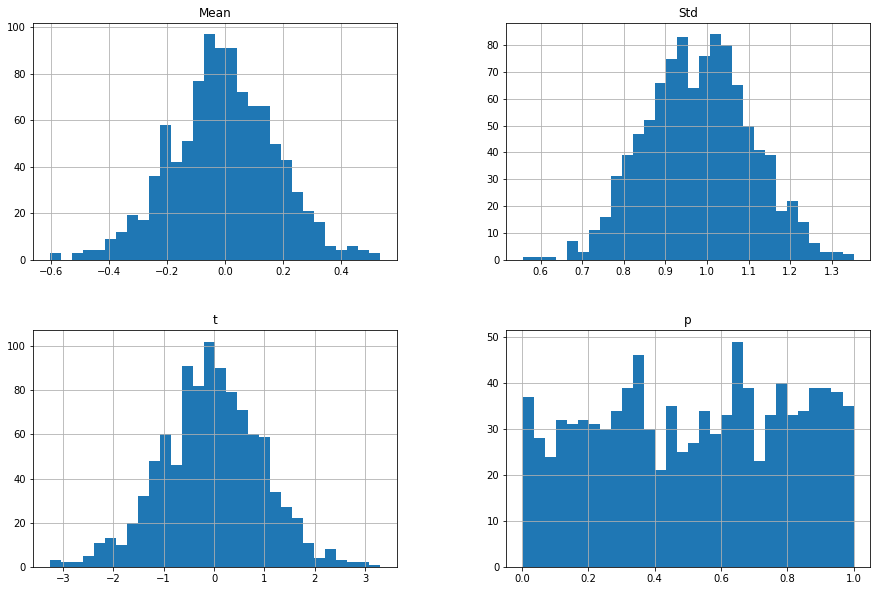

In [ ]:
results = []

actual_mean = 0.0
sample_size = 30

for i in range(1000): 
  sample = np.random.normal(loc=actual_mean, scale=1, size=sample_size)
  test_result= ttest_1samp(sample, popmean=0)
  results.append(( sample.mean(), sample.std(), test_result.statistic, test_result.pvalue))

test_results = pd.DataFrame(results, columns=["Mean", "Std", "t", "p"])
critical_value = 0.05
print("number of significant results:", np.sum(test_results["p"] < critical_value))

test_results.hist(figsize=(15,10), bins=30)
pyplot.show()

number of significant results: 173


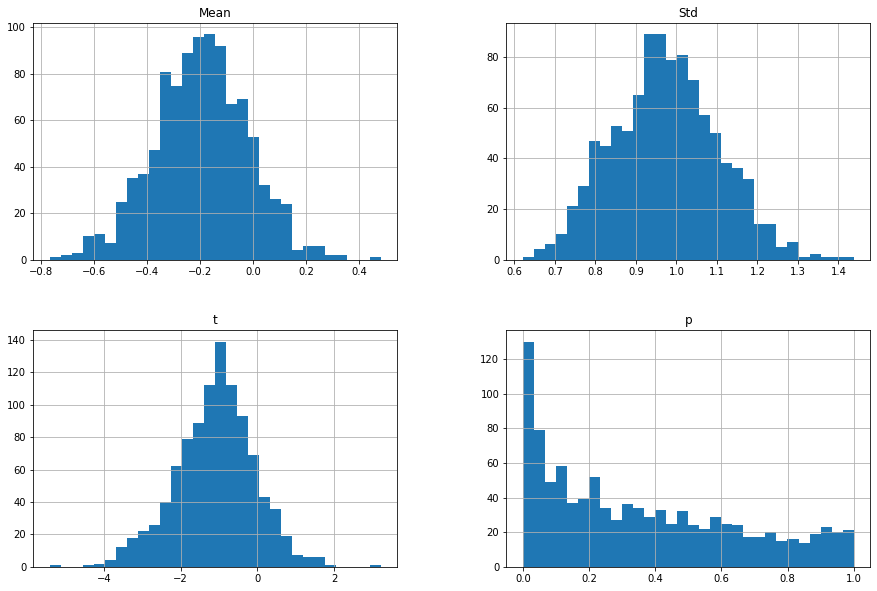

In [ ]:
results = []

actual_mean = -.2
sample_size = 30

for i in range(1000): 
  sample = np.random.normal(loc=actual_mean, scale=1, size=sample_size)
  test_result= ttest_1samp(sample, popmean=0)
  results.append(( sample.mean(), sample.std(), test_result.statistic, test_result.pvalue))

test_results = pd.DataFrame(results, columns=["Mean", "Std", "t", "p"])
critical_value = 0.05
print("number of significant results:", np.sum(test_results["p"] < critical_value))

test_results.hist(figsize=(15,10), bins=30)
pyplot.show()

number of significant results: 989


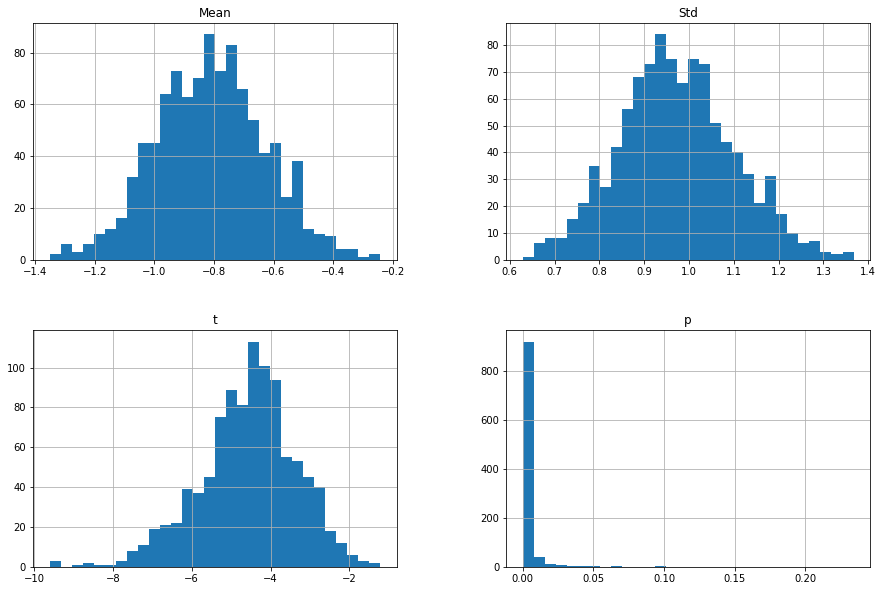

In [ ]:
results = []

actual_mean = -.8
sample_size = 30

for i in range(1000): 
  sample = np.random.normal(loc=actual_mean, scale=1, size=sample_size)
  test_result= ttest_1samp(sample, popmean=0)
  results.append(( sample.mean(), sample.std(), test_result.statistic, test_result.pvalue))

test_results = pd.DataFrame(results, columns=["Mean", "Std", "t", "p"])
critical_value = 0.05
print("number of significant results:", np.sum(test_results["p"] < critical_value))

test_results.hist(figsize=(15,10), bins=30)
pyplot.show()

number of significant results: 994


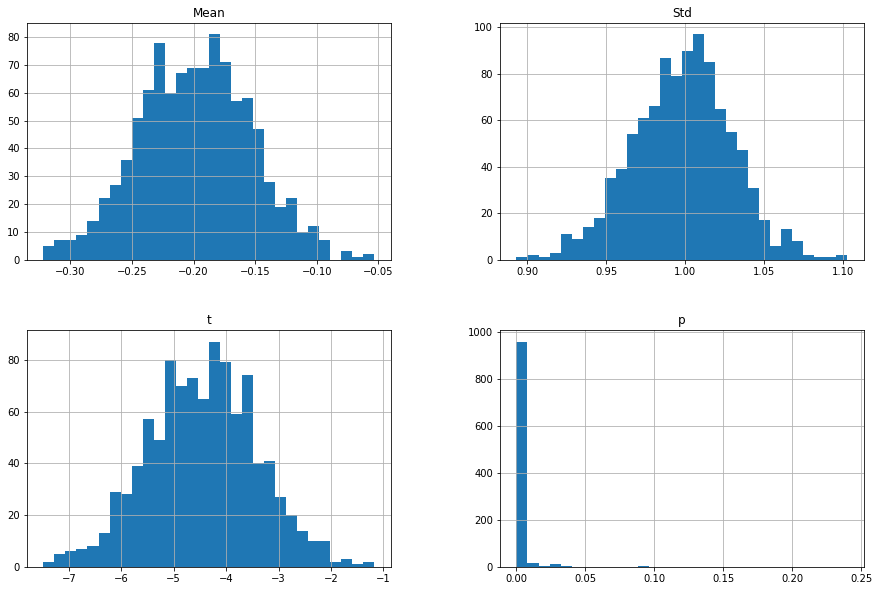

In [ ]:
results = []

actual_mean = -.2
sample_size = 500

for i in range(1000): 
  sample = np.random.normal(loc=actual_mean, scale=1, size=sample_size)
  test_result= ttest_1samp(sample, popmean=0)
  results.append(( sample.mean(), sample.std(), test_result.statistic, test_result.pvalue))

test_results = pd.DataFrame(results, columns=["Mean", "Std", "t", "p"])
critical_value = 0.05
print("number of significant results:", np.sum(test_results["p"] < critical_value))

test_results.hist(figsize=(15,10), bins=30)
pyplot.show()

Assume that you know the true distribution, but not the p-value for an experiment.

**Answer here:**


If the null hypothesis is true, what range of p-values do you expect?

*   In order not to reject null hypothesis, p-value should be over the critical value which is 0.05. As we rerun the codes above, the numbers of significant results were shown as 174, 989, and 994. Likewise, the probability is over 0.5 which means that is cannot reject null hypothesis. 

If the null hypothesis is *not* true, what p-values do you expect?

*   In order to reject null hypothesis, the p-values should be less than critical values (0.05). As we have seen in the first code, the significant result number is 49 which is close to 0.05.  



Now assume that you don't know the true distribution, but you have a p-value.

**Answer here:**


What can you say about the hypothesis if your p-value is 0.000038? What can you *not* say?

*   It strongly rejects a null hypothesis as p-value is close to 0, but we can not say that null hypothesis is wrong. There are still possiblity for type 1 or type 2 errors as p-value is not 0.

What can you say about the hypothesis if your p-value is 0.052? What can you *not* say? 

*   It also rejects a null hypothesis as p-value is less than 0.05. However, we cannot say it strongly evidences that the null hypothesis is rejected. 

## Part 5:  Permutation tests and two-sample t-tests (10 points)

Next we'll look at a variation of the t-test that takes two arrays and asks if they have the same mean (null hypothesis) or different means (alternative hypothesis). The function is [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind) because we are comparing two *independent* samples: they can be of any size, and there doesn't have to be a match between elements of the two arrays. (This is opposed to a *paired* t test, where every value in one array has a "buddy" in the other array.)

Previously we had to specify the population mean that we are testing against, but in the two-sample case we don't need to, since we're comparing one array's mean to another.

Here you'll write the code yourself. Create two arrays, both from normal distributions with standard deviation 1.0 and size 15, but one with mean 0.0 and the other with mean (`loc`) 0.7. Then calculate the $p$-value for the two samples using [stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind).

In [ ]:
# code here
sample_a = np.random.normal(loc=0, scale=1.0, size=15)
sample_b = np.random.normal(loc=0.7, scale=1.0, size=15)

ttest_result = ttest_ind(sample_a, sample_b)
print(ttest_result)

Ttest_indResult(statistic=-0.7828627790250985, pvalue=0.44027912848836326)


Now compare this test to a permutation test. Use code similar to the bootstrap example above. Create an array of zeros of length 10000, and then use a for-loop to do the following 10000 times: create two permuted arrays from the two real arrays and record the absolute value of the difference between them.

Now calculate the number of times you got a difference in means whose *absolute value* is greater than the actual difference in means you observed from your samples. Print this proportion. Describe how it compares with the p-value from the two-sample t-test above.

In [ ]:
# This function returns two new arrays that contain the elements of a and b, randomly shuffled between them
def permute_two_arrays(a, b):
    shuffled_array = np.concatenate([a, b])
    np.random.shuffle(shuffled_array)
    return (shuffled_array[:len(a)], shuffled_array[len(a):])

permutation_data = np.zeros(10000)
actual_substract = abs(sample_a.mean() - sample_b.mean())
for i in range(10000):
  resampled_a, resampled_b = permute_two_arrays(sample_a, sample_b)
  permutation_data[i] = abs((resampled_a - resampled_b).mean())

result = filter(lambda x: x > actual_substract, permutation_data)


print("proportion: ", len(list(result)) / len(permutation_data))

proportion:  0.4415


**Answer here**

It is close to the result given from ttest (ttest pvalue= approx. 0.4402, permutation pvalue: 0.4415). However, t-test does not assume a normal distribution. On the other hand,  permutation test could assume normal distribution, as it shuffles 10000 time, which means that it has higher validity. 

